# 통계분석 과제 (ANOVA)
## One -Way ANOVA 
- titanic 데이터에서 class에 따른 평균 fare의 차이가 있는지를 검정하세요 


In [5]:
import pandas as pd 
df = pd.read_csv('data/titanic.csv')

In [6]:
df['class'].value_counts()

Third     491
First     216
Second    184
Name: class, dtype: int64

#### 1. 가설 설정
##### > H0 : class에 따른 평균 Fare의 차이가 없다.
##### > H1 : 적어도 한 class에 대한 평균 Fare는 다르다.
#### 2. 유의수준 설정 : 0.05 
#### 3. 기각역 설정
#### 4. 전처리 및 통계량 계산(F통계량 = 집단 간 변동 / 집단 내 변동)
#### 5. 해석

In [7]:
# 4. 전처리 및 통계량 계산
df.info() # class와 fare의 결측치 X

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [8]:
# 4. 전처리 및 통계량 계산
# One-Way ANOAVA : 한 기준 요인(class)에 따라 구하고자하는 변수(fare)의 평균 차이가 있는지 검정
s_f = df.loc[df['class'] == 'First','fare']
s_s = df.loc[df['class'] == 'Second', 'fare']
s_t = df.loc[df['class'] == 'Third', 'fare']

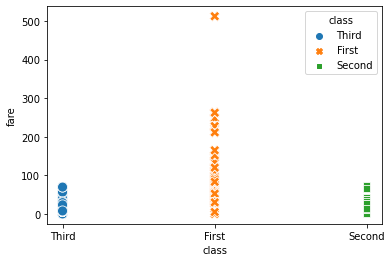

In [31]:
# 시각화
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x = 'class',
                y = 'fare',
                hue = 'class', # 그룹 별 색깔
                style = 'class', # 그룹 별 모양
                s = 100,
                data = df)

plt.show()

In [29]:
# 정규성(데이터 크기 동일 필요), 등분산성 검정
import scipy.stats as stats
from scipy.stats import shapiro, kruskal,levene
print(stats.shapiro(s_f))
print(stats.shapiro(s_s))
print(stats.shapiro(s_t))
print(stats.levene(s_f,s_s,s_t))

ShapiroResult(statistic=0.718401312828064, pvalue=7.556354866266318e-19)
ShapiroResult(statistic=0.7785055637359619, pvalue=2.1134516002102284e-15)
ShapiroResult(statistic=0.6183854937553406, pvalue=1.5995106796893175e-31)
LeveneResult(statistic=118.57020037111805, pvalue=2.288618662046418e-46)


##### 세 집단 모두 정규성을 만족하지 못한다. 즉, 세 집단 모두 정규분포를 띄지 않는다.
##### 세 집단 중 적어도 한 집단의 분산은 다르다.(등분산성 만족 X)

In [18]:
# 정규성을 만족하지 못하는 경우 
stats.kruskal(s_f,s_s,s_t)

KruskalResult(statistic=438.0437034212556, pvalue=7.586096900646798e-96)

##### 정규성을 만족하지 않으므로, stats.kruskal 검정을 실시했다.
##### 통계량은 438.043 이며, 유의확률(p-value) 값이 0.05보다 작으므로, 귀무가설을 기각하고 대립가설을 채택한다.
##### 즉, class에 따른 평균 fare에는 통계적으로 유의미한 차이가 있으며, 적어도 한 class의 대한 평균 fare는 다르다.

In [ ]:
# 만약 정규성을 만족하고 등분산성을 만족 못하는 경우
!pip install pingouin 
import pinguin as pg
pg.welch_anova(data = df, dv = 'fare', between = 'class')

In [21]:
# 만약 정규성과 등분산성을 모두 만족하는 경우
stats.f_oneway(s_f,s_s,s_t)

F_onewayResult(statistic=242.34415651744814, pvalue=1.0313763209141171e-84)

##### 통계량은 242.344 이며, 유의확률(p-value) 값이 0.05보다 작으므로, 귀무가설을 기각하고 대립가설을 채택한다.
##### 즉, class에 따른 평균 fare에는 통계적으로 유의미한 차이가 있으며, 적어도 한 class의 대한 평균 fare는 다르다.

In [26]:
# 사후 검정 : 세 가지 class 중 어떠한 class 간에 평균 fare의 차이가 있는지 알아보자.
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison
mc = MultiComparison(data = df['fare'], groups = df['class'])
tukeyhsd = mc.tukeyhsd(alpha = 0.05)
tukeyhsd.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
First,Second,-63.4925,-0.0,-72.9165,-54.0685,True
First,Third,-70.4791,-0.0,-78.1489,-62.8094,True
Second,Third,-6.9866,0.108,-15.1064,1.1331,False


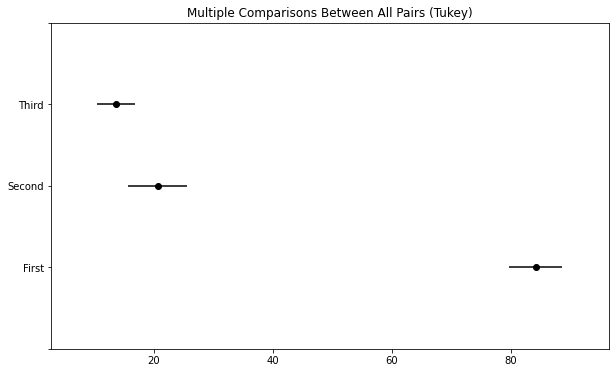

In [28]:
fig = tukeyhsd.plot_simultaneous()

##### 대립가설 채택에 따라, 어떠한 class 간의 평균 fare차이가 있는지 검정하기 위해, 사후 분석 중 tukeyhsd 분석을 실시했다.
##### H0 : 집단들 사이의 평균은 같다. H1 : 집단들 사이의 평균이 같지 않다.
##### 그리고 모든 집단 수준에 대하여, 두 집단씩 짝을 지어 각각 다중 비교를 수행한다.
##### 첫 번째 그룹인 First - Second, 두 번째 그룹인 Second-Third는 유의확률이 0.05보다 작으므로 평균 비교에 대한 귀무가설을 기각하고 대립가설을 채택한다.
#####  First - Second 그룹과 Second-Third 그룹은 각각 평균 fare은 통계적으로 유의미한 차이가 있다.
##### meandiff는 (group2 - group1) 이므로 First class는 Second class 보다  fare가 평균 63 높고, First class는 Third class 보다 fare가 평균 70 이 높으므로, First class가 다른 모든 class에 비해 통계적으로 유의한 큰 값을 가진다고 해석할 수 있다.


## Two -Way ANOVA 
- titanic 데이터에서 class와 sex에 따른 fare의 차이를 검정하세요. 
- 1. 교호작용효과 검정 
- 2. class효과 검정 
- 3. sex 효과 검정 

#### 1. 가설 설정
##### 주효과 검정
##### > H0 : class에 따른 평균 Fare의 차이가 존재하지 않는다.
##### > H1 : class에 따른 평균 Fare의 차이가 존재한다.

##### > H0 : sex에 따른 평균 Fare의 차이가 존재하지 않는다.
##### > H1 : sex에 따른 평균 Fare의 차이가 존재한다.

##### 상호작용효과 검정
##### H0 : class와 sex 간에는 상호작용효과가 없다. class와 sex에 따른 평균 fare 차이가 존재하지 않는다.
##### H1 : class와 sex 간에는 상호작용효과가 있다. class와 sex에 따른 평균 fare 차이가 존재한다.

#### 2. 유의수준 설정 : 0.05 
#### 3. 기각역 설정
#### 4. 전처리 및 통계량 계산(F통계량 = 집단 간 변동 / 집단 내 변동)
#### 5. 해석

In [33]:
# 4. 전처리 및 통계량 계산
df = pd.read_csv('data/titanic.csv')
df.info() # class, sex, fare 결측값 X

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [34]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [42]:
# 독립변수와 종속변수 Series로 변경
s_c = df['class']
s_s = df['sex']
s_f = df['fare']
# 독립변수와 종속변수 DF로 변경
df_t = df[['class', 'sex','fare']]

# 'class' 예약어로 컬럼명 변경
df_t.rename({'class':'c'}, axis = 'columns', inplace = True)

C:\Users\KDB\AppData\Local\Temp\ipykernel_101056\196671142.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t.rename({'class':'c'}, axis = 'columns', inplace = True)


In [44]:
df_t.head()

,c,sex,fare
0,Third,male,7.2500
1,First,female,71.2833
2,Third,female,7.9250
3,First,female,53.1000
4,Third,male,8.0500


In [46]:
# 분산분석 수행
formula = 'fare~C(c)*C(sex)'
model = ols(formula, df_t).fit()
aov_table = anova_lm(model, type = 2)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(c),2.0,7.760301e+05,388015.028289,256.265184,1.585048e-88
C(sex),1.0,3.174857e+04,31748.565217,20.968394,5.337586e-06
C(c):C(sex),2.0,5.002816e+04,25014.078906,16.520591,9.034206e-08
Residual,885.0,1.339992e+06,1514.115269,NaN,NaN


##### 만약 이원배치분석에서 상호작용효과가 있을 경우, 주효과 검정의 의미가 무효화 되므로, 먼저 해석한다.
##### 상호작용효과 검정에서 class와 sex의 경우 유의확률이 0.05보다 작으므로, 귀무가설을 기각하고 대립가설을 채택한다.
##### class와 sex의 경우 상호작용효과가 존재하며, 이는 class와 sex에 따른 평균 fare의 차이가 존재함을 의미한다.
##### 즉 class가 평균 fare의 미치는 영향이 sex의 수준에 따라서 달라진다(혹은, sex가 평균 Fare 값에 미치는 영향이 class 수준에 따라서 달라진다)
##### 상호작용효과가 존재하므로, 주효과 검정은 무의미하다.
##### 만약 상호작용효과가 없다면, 각각의 요인들은 통계량이 0.05보다 작으므로 독립적으로 평균 fare 값에 영향을 미친다.

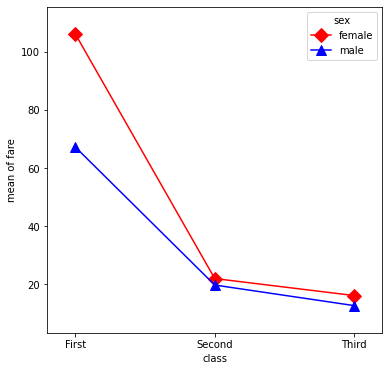

In [53]:
# 상호작용그래프
import matplotlib.pyplot as plt
from statsmodels.graphics.factorplots import interaction_plot

fig, ax = plt.subplots(figsize = (6,6))
fig = interaction_plot(s_c, s_s, s_f, colors = ['red', 'blue'], markers=['D', '^'], ms = 10, ax = ax)

##### 일반적으로 상호작용그래프에서 두 선이 교차하고 있을 시에는 X축에 있는 독립변수와 그래프에서 시각화된 독립변수 간에 상호작용이 존재한다.
##### female의 그래프가 first clas로 갈수록 급격하게 올라간다. 
##### 이는 female의 fare는 class 수준에 영향을 받았음을 알 수 있으며,  first 클래스 일수록 여자의 소비는 남자의 소비보다 더 높아지는 경향이 있다.